In [1]:
import pandas as pd

df_images  = pd.read_csv('Imagewise_data.csv')

df_images

C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Image Name,Category,Clinical Diagnosis,Lesion Annotation Count
0,R-01-01,OPMD,Leukoplakia,1
1,R-01-02,OPMD,Leukoplakia,1
2,R-01-03,Benign,Coated Tongue,1
3,R-02-01,Benign,VBD,1
4,R-02-02,Benign,VBD,1
...,...,...,...,...
2995,N-359-05,OPMD,OSF,1
2996,N-359-06,OPMD,OSF,1
2997,N-359-07,OPMD,OSF,1
2998,N-359-08,OPMD,OSF,1


In [2]:
df_images ['Category'].value_counts()

Category
OPMD       1394
Benign      748
Healthy     729
OCA         129
Name: count, dtype: int64

In [3]:
df_images ['Clinical Diagnosis'].value_counts()

Clinical Diagnosis
Normal Mucosa                    728
OSF                              684
OLP                              358
Oral Cancer                      125
VBD                              123
                                ... 
Minor Salivary Gland Tumour        1
Papiloma                           1
Haemangioma                        1
Ranula/ Dermoid Cycst              1
Desquamative Gingivitis + OLP      1
Name: count, Length: 155, dtype: int64

In [4]:

df_patients  = pd.read_csv('Patientwise_data.csv')

df_patients

,Patient ID,Age,Gender,Smoking,Chewing_Betel_Quid,Alcohol,Image Count
0,R-01,63,M,No,No,No,3
1,R-02,17,F,No,No,No,8
2,R-03,70,M,No,No,No,5
3,R-04,45,M,No,No,No,5
4,R-05,46,M,No,Yes,No,2
...,...,...,...,...,...,...,...
709,N-355,30,M,No,Yes,No,13
710,N-356,22,M,No,No,No,10
711,N-357,30,F,No,No,No,8
712,N-358,68,F,No,Yes,No,10


In [5]:
import pandas as pd

df_images['Patient ID'] = df_images['Image Name'].str.extract(r'^([A-Z]-\d{2,})')

merged_df = pd.merge(
    df_images,
    df_patients,
    on='Patient ID',
    how='left'
)

print(merged_df.head())

  Image Name Category Clinical Diagnosis  Lesion Annotation Count Patient ID  \
0    R-01-01     OPMD        Leukoplakia                        1       R-01   
1    R-01-02     OPMD        Leukoplakia                        1       R-01   
2    R-01-03   Benign      Coated Tongue                        1       R-01   
3    R-02-01   Benign                VBD                        1       R-02   
4    R-02-02   Benign                VBD                        1       R-02   

    Age Gender Smoking Chewing_Betel_Quid  Alcohol  Image Count  
0  63.0      M      No                  No      No          3.0  
1  63.0      M      No                  No      No          3.0  
2  63.0      M      No                  No      No          3.0  
3  17.0      F      No                  No      No          8.0  
4  17.0      F      No                  No      No          8.0  


In [6]:
merged_df

,Image Name,Category,Clinical Diagnosis,Lesion Annotation Count,Patient ID,Age,Gender,Smoking,Chewing_Betel_Quid,Alcohol,Image Count
0,R-01-01,OPMD,Leukoplakia,1,R-01,63.0,M,No,No,No,3.0
1,R-01-02,OPMD,Leukoplakia,1,R-01,63.0,M,No,No,No,3.0
2,R-01-03,Benign,Coated Tongue,1,R-01,63.0,M,No,No,No,3.0
3,R-02-01,Benign,VBD,1,R-02,17.0,F,No,No,No,8.0
4,R-02-02,Benign,VBD,1,R-02,17.0,F,No,No,No,8.0
...,...,...,...,...,...,...,...,...,...,...,...
2995,N-359-05,OPMD,OSF,1,N-359,41.0,M,No,Yes,No,9.0
2996,N-359-06,OPMD,OSF,1,N-359,41.0,M,No,Yes,No,9.0
2997,N-359-07,OPMD,OSF,1,N-359,41.0,M,No,Yes,No,9.0
2998,N-359-08,OPMD,OSF,1,N-359,41.0,M,No,Yes,No,9.0


In [7]:
data1 = merged_df.iloc[:,[1,5,6,7,8,9,0]]
data1

,Category,Age,Gender,Smoking,Chewing_Betel_Quid,Alcohol,Image Name
0,OPMD,63.0,M,No,No,No,R-01-01
1,OPMD,63.0,M,No,No,No,R-01-02
2,Benign,63.0,M,No,No,No,R-01-03
3,Benign,17.0,F,No,No,No,R-02-01
4,Benign,17.0,F,No,No,No,R-02-02
...,...,...,...,...,...,...,...
2995,OPMD,41.0,M,No,Yes,No,N-359-05
2996,OPMD,41.0,M,No,Yes,No,N-359-06
2997,OPMD,41.0,M,No,Yes,No,N-359-07
2998,OPMD,41.0,M,No,Yes,No,N-359-08


In [8]:
data1["Image Name"] = data1["Image Name"].astype(str).str.strip()
data1["Image Name"] = data1["Image Name"].apply(lambda x: x if x.lower().endswith(".jpg") else x + ".jpg")

C:\Users\pablo.ormeno\AppData\Local\Temp\ipykernel_18076\489354503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Image Name"] = data1["Image Name"].astype(str).str.strip()
C:\Users\pablo.ormeno\AppData\Local\Temp\ipykernel_18076\489354503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Image Name"] = data1["Image Name"].apply(lambda x: x if x.lower().endswith(".jpg") else x + ".jpg")


In [9]:
data1

,Category,Age,Gender,Smoking,Chewing_Betel_Quid,Alcohol,Image Name
0,OPMD,63.0,M,No,No,No,R-01-01.jpg
1,OPMD,63.0,M,No,No,No,R-01-02.jpg
2,Benign,63.0,M,No,No,No,R-01-03.jpg
3,Benign,17.0,F,No,No,No,R-02-01.jpg
4,Benign,17.0,F,No,No,No,R-02-02.jpg
...,...,...,...,...,...,...,...
2995,OPMD,41.0,M,No,Yes,No,N-359-05.jpg
2996,OPMD,41.0,M,No,Yes,No,N-359-06.jpg
2997,OPMD,41.0,M,No,Yes,No,N-359-07.jpg
2998,OPMD,41.0,M,No,Yes,No,N-359-08.jpg


In [10]:
data1.columns

Index(['Category', 'Age', 'Gender', 'Smoking', 'Chewing_Betel_Quid ',
       'Alcohol', 'Image Name'],
      dtype='object')

In [11]:
print(data1['Gender'].unique())

['M' 'F' nan]


In [12]:
import pandas as pd

summary = data1.groupby('Category').agg(
    Count=('Age', 'count'),
    Mean_Age=('Age', 'mean'),
    Male_Pct=('Gender', lambda x: (x == 'M').mean() * 100),
    Smoking_Pct=('Smoking', lambda x: (x == 'Yes').mean() * 100),
    Betel_Pct=('Chewing_Betel_Quid ', lambda x: (x == 'Yes').mean() * 100),
    Alcohol_Pct=('Alcohol', lambda x: (x == 'Yes').mean() * 100)
).round(1)

print(summary)

          Count  Mean_Age  Male_Pct  Smoking_Pct  Betel_Pct  Alcohol_Pct
Category                                                                
Benign      748      46.9      58.8         10.0       15.0          4.8
Healthy     697      43.3      45.7          7.4       16.6          4.4
OCA         129      61.8      55.0         10.1       76.7          7.0
OPMD       1394      48.6      63.8         11.9       60.2         11.0


In [13]:
from scipy.stats import ttest_ind, mannwhitneyu

oca_ages = data1[data1['Category'] == 'OCA']['Age'].dropna()
non_oca_ages = data1[data1['Category'] != 'OCA']['Age'].dropna()

t_stat, p_t = ttest_ind(oca_ages, non_oca_ages, equal_var=False)
print(f"T-test p-value: {p_t:.30f}")

u_stat, p_u = mannwhitneyu(oca_ages, non_oca_ages, alternative='two-sided')
print(f"Mann–Whitney U p-value: {p_u:.30f}")

T-test p-value: 0.000000000000000000000000116952
Mann–Whitney U p-value: 0.000000000000000000178597723685


In [14]:
root_dir = 'Imacitas'
allFileNames = os.listdir(root_dir)
#print(allFileNames)
print('Total Imagenes: ', len(allFileNames))

NameError: name 'os' is not defined

In [15]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

INPUT_DIR = "Images_copy"           # original images
OUTPUT_DIR = "Images_copy_Preproc"  # processed images
TARGET_SIZE = (256, 256)       # resize size
BORDER_SIZE = 2                # black border in pixels
BLUR_KERNEL = (2, 2)           # mild blur
RMS_THRESHOLD = 3              # duplicate threshold

os.makedirs(OUTPUT_DIR, exist_ok=True)

def preprocess_image(img_path):
    """Load image, resize, add border, blur."""
    img = cv2.imread(img_path)
    if img is None:
        return None
    img = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)
    img = cv2.copyMakeBorder(img, BORDER_SIZE, BORDER_SIZE, BORDER_SIZE, BORDER_SIZE,
                             cv2.BORDER_CONSTANT, value=[0, 0, 0])
    img = cv2.blur(img, BLUR_KERNEL)  # mild blur
    return img

def rms_error(img1, img2):
    """Calculate RMS error between two images."""
    diff = cv2.absdiff(img1, img2)
    mse = np.mean(diff ** 2)
    return np.sqrt(mse)

processed_images = []
filenames = []
duplicates = set()

print("Processing and checking for duplicates...")
for fname in tqdm(sorted(os.listdir(INPUT_DIR))):
    fpath = os.path.join(INPUT_DIR, fname)
    img = preprocess_image(fpath)
    if img is None:
        continue

    is_duplicate = False
    for existing_img in processed_images:
        if img.shape == existing_img.shape:
            if rms_error(img, existing_img) < RMS_THRESHOLD:
                is_duplicate = True
                duplicates.add(fname)
                break

    if not is_duplicate:
        processed_images.append(img)
        filenames.append(fname)
        cv2.imwrite(os.path.join(OUTPUT_DIR, fname), img)

print(f"✅ Done! {len(processed_images)} unique images saved to '{OUTPUT_DIR}'.")
print(f"🗑 {len(duplicates)} duplicates removed.")

Processing and checking for duplicates...


100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [52:43<00:00,  1.05s/it]

✅ Done! 2988 unique images saved to 'Images_copy_Preproc'.
🗑 12 duplicates removed.


In [15]:
import os
print("CWD:", os.getcwd())
print("IMG_DIR exists?", os.path.isdir("Images_copy_Preproc"))
print("First 5 files in IMG_DIR:", os.listdir("Images_copy_Preproc")[:5])


tmp = data1.copy()
tmp["Image Name"] = tmp["Image Name"].astype(str).str.strip()
tmp["filepath"] = tmp["Image Name"].apply(lambda n: os.path.join("Images_copy_Preproc", n))
exists_mask = tmp["filepath"].apply(os.path.isfile)

print("Total rows:", len(tmp))
print("Files found:", exists_mask.sum())
print("Files missing:", (~exists_mask).sum())
print("First 5 missing paths:", tmp.loc[~exists_mask, "filepath"].head().tolist())
exists_mask

CWD: C:\Users\pablo.ormeno\1AA_ZENODO_DATASET
IMG_DIR exists? True
First 5 files in IMG_DIR: ['C-10-12-5.jpg', 'C-10-2-7.jpg', 'C-10-3-6.jpg', 'C-10-4-3.jpg', 'C-10-5-4.jpg']
Total rows: 3000
Files found: 2988
Files missing: 12
First 5 missing paths: ['Images_copy_Preproc\\S-46-05.jpg', 'Images_copy_Preproc\\C-33-5-4.jpg', 'Images_copy_Preproc\\C-33-6-5.jpg', 'Images_copy_Preproc\\C-33-7-1.jpg', 'Images_copy_Preproc\\C-33-7-2.jpg']


0       True
1       True
2       True
3       True
4       True
        ... 
2995    True
2996    True
2997    True
2998    True
2999    True
Name: filepath, Length: 3000, dtype: bool

In [17]:
import os, numpy as np, pandas as pd, tensorflow as tf
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # or comment this to strictly skip

from tensorflow.keras.applications import densenet
from tensorflow.keras.utils import load_img, img_to_array

IMG_DIR = "Images_copy_Preproc"
TARGET = (224, 224)

d = 512  #

base = tf.keras.applications.DenseNet121(
    include_top=False, weights="imagenet", pooling="avg", input_shape=(224,224,3)
)

base.trainable = False

projector = tf.keras.Sequential([
    base,
    tf.keras.layers.Dense(d, activation=None, name=f"proj_{d}d")  # linear projection to d dims
])

preprocess = tf.keras.applications.densenet.preprocess_input

print("AQUI 1")

def safe_embed(path):
    try:
        img = load_img(path, target_size=TARGET)
        x = img_to_array(img)
        x = preprocess(x)[None, ...]      # shape (1,224,224,3)
        emb = projector.predict(x, verbose=0)[0]
        return emb
    except Exception as e:
        return None

paths = (data1["Image Name"].astype(str).str.strip()
         .apply(lambda n: os.path.join(IMG_DIR, n)))

print("AQUI 2")
#files = os.listdir(IMG_DIR)
#print(paths)
#print(files)

embeddings = [safe_embed(p) for p in paths]

#embeddings = [safe_embed(os.path.join(IMG_DIR, p)) for p in files]


# Optional: check the first valid vector’s shape to confirm d
first_valid = next((e for e in embeddings if e is not None), None)
if first_valid is not None:
    print("Embedding dimension:", first_valid.shape)  # should be (d,)
else:
    print("No valid embeddings were produced. Check paths and images.")


AQUI 1
AQUI 2
Embedding dimension: (512,)


In [18]:
len(embeddings)

3000

In [266]:
d

512

In [19]:
import pandas as pd
import numpy as np


EMB_SIZE = d  


emb_array = [
    np.full(EMB_SIZE, np.nan) if e is None else e
    for e in embeddings
]


df_emb = pd.DataFrame(emb_array)


df_emb.insert(0, "Image Name", data1["Image Name"].values)


df_emb.to_csv("image_embeddings_with_names.csv", index=False)

print("Embeddings saved to image_embeddings_with_names.csv")

Embeddings saved to image_embeddings_with_names.csv


In [20]:
df_emb

,Image Name,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,R-01-01.jpg,0.383959,-0.496823,-0.218683,0.130639,1.407742,-0.341114,-0.328489,0.067666,0.280571,...,1.535886,-1.640387,-0.537698,1.629860,-1.168424,-1.000634,-0.742940,0.492302,-0.494954,2.075169
1,R-01-02.jpg,0.338558,-0.695602,0.385272,-0.354746,1.855360,-0.331229,0.024585,0.490230,-0.141135,...,0.844914,-1.636414,-0.906013,0.746079,-0.190332,-0.775245,0.953777,0.510547,0.114917,1.565869
2,R-01-03.jpg,0.885210,-0.504526,-0.164655,-1.035539,1.163632,-0.947009,1.654956,-0.578470,-0.100276,...,0.187054,-0.588985,-1.491505,2.044770,-0.903123,-0.205565,1.053456,0.149950,0.013408,2.834152
3,R-02-01.jpg,1.846248,-0.113879,0.201132,-0.670050,0.912668,-1.604343,0.724550,-0.557977,0.352966,...,0.811638,-1.578659,-0.467129,2.568434,-0.505306,-0.861006,0.968682,-0.714083,2.218504,1.583832
4,R-02-02.jpg,0.861900,-0.809013,-0.539069,-0.019195,1.260911,-1.156381,-0.044218,0.560760,-0.187930,...,0.377032,-1.500556,-0.606365,1.672603,0.647529,-0.366588,0.681903,-1.728403,0.894351,0.744140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,N-359-05.jpg,0.080543,-1.011834,0.391188,-0.036418,2.456992,-0.108519,0.177177,-0.160959,-0.616627,...,0.690704,-0.373083,-1.250056,2.416950,0.065241,-0.838787,-0.131475,0.287645,0.880054,2.480803
2996,N-359-06.jpg,0.552028,-1.853970,-0.140645,-1.092849,2.498071,-0.765995,0.416046,0.501624,-0.476097,...,1.020066,-0.552512,-1.738115,2.577219,-0.110661,-1.110566,-0.576646,-0.300047,0.567249,2.588681
2997,N-359-07.jpg,-0.136671,-2.422337,0.332250,-1.010924,3.273554,-0.021993,0.222713,0.352074,-0.492974,...,0.656128,-0.466437,-2.211529,2.222891,0.016805,-0.950535,-0.118359,-0.058613,0.058531,1.969514
2998,N-359-08.jpg,0.469778,-2.366817,0.322448,-0.986565,2.540421,-0.121149,0.480143,0.258846,-0.508039,...,0.966100,-0.454721,-1.726866,2.193454,0.255241,-1.512909,-0.071840,0.125962,0.357540,2.051885


In [21]:
import pandas as pd


df_emb = pd.read_csv("image_embeddings_with_names.csv") # Read the saved embeddings CSV
data1_copy = data1.copy() # Make a copy of your original dataframe
data1_copy = data1_copy.merge(df_emb, on="Image Name", how="left")

print("Merged dataframe shape:", data1_copy.shape)

print(data1_copy.head(3))

Merged dataframe shape: (3000, 519)
  Category   Age Gender Smoking Chewing_Betel_Quid  Alcohol   Image Name  \
0     OPMD  63.0      M      No                  No      No  R-01-01.jpg   
1     OPMD  63.0      M      No                  No      No  R-01-02.jpg   
2   Benign  63.0      M      No                  No      No  R-01-03.jpg   

          0         1         2  ...       502       503       504       505  \
0  0.383959 -0.496823 -0.218683  ...  1.535886 -1.640387 -0.537698  1.629860   
1  0.338558 -0.695602  0.385272  ...  0.844914 -1.636414 -0.906013  0.746079   
2  0.885210 -0.504526 -0.164655  ...  0.187054 -0.588985 -1.491505  2.044770   

        506       507       508       509       510       511  
0 -1.168424 -1.000634 -0.742940  0.492302 -0.494954  2.075169  
1 -0.190332 -0.775245  0.953777  0.510547  0.114917  1.565869  
2 -0.903123 -0.205565  1.053456  0.149950  0.013408  2.834152  

[3 rows x 519 columns]


In [22]:
data1_copy

,Category,Age,Gender,Smoking,Chewing_Betel_Quid,Alcohol,Image Name,0,1,2,...,502,503,504,505,506,507,508,509,510,511
0,OPMD,63.0,M,No,No,No,R-01-01.jpg,0.383959,-0.496823,-0.218683,...,1.535886,-1.640387,-0.537698,1.629860,-1.168424,-1.000634,-0.742940,0.492302,-0.494954,2.075169
1,OPMD,63.0,M,No,No,No,R-01-02.jpg,0.338558,-0.695602,0.385272,...,0.844914,-1.636414,-0.906013,0.746079,-0.190332,-0.775245,0.953777,0.510547,0.114917,1.565869
2,Benign,63.0,M,No,No,No,R-01-03.jpg,0.885210,-0.504526,-0.164655,...,0.187054,-0.588985,-1.491505,2.044770,-0.903123,-0.205565,1.053456,0.149950,0.013408,2.834152
3,Benign,17.0,F,No,No,No,R-02-01.jpg,1.846248,-0.113879,0.201132,...,0.811638,-1.578659,-0.467129,2.568434,-0.505306,-0.861006,0.968682,-0.714083,2.218504,1.583832
4,Benign,17.0,F,No,No,No,R-02-02.jpg,0.861900,-0.809013,-0.539069,...,0.377032,-1.500556,-0.606365,1.672603,0.647529,-0.366588,0.681903,-1.728403,0.894351,0.744140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,OPMD,41.0,M,No,Yes,No,N-359-05.jpg,0.080543,-1.011834,0.391188,...,0.690704,-0.373083,-1.250056,2.416950,0.065241,-0.838787,-0.131475,0.287645,0.880054,2.480803
2996,OPMD,41.0,M,No,Yes,No,N-359-06.jpg,0.552028,-1.853970,-0.140645,...,1.020066,-0.552512,-1.738115,2.577219,-0.110661,-1.110566,-0.576646,-0.300047,0.567249,2.588681
2997,OPMD,41.0,M,No,Yes,No,N-359-07.jpg,-0.136671,-2.422337,0.332250,...,0.656128,-0.466437,-2.211529,2.222891,0.016805,-0.950535,-0.118359,-0.058613,0.058531,1.969514
2998,OPMD,41.0,M,No,Yes,No,N-359-08.jpg,0.469778,-2.366817,0.322448,...,0.966100,-0.454721,-1.726866,2.193454,0.255241,-1.512909,-0.071840,0.125962,0.357540,2.051885


In [23]:
bins = [0, 13, 20, 40, 60, 200]
labels = ["Child", "Teenager", "Young Adult", "Middle-aged", "Older Adult"]

data1_copy["Age_Group"] = pd.cut(data1_copy["Age"], bins=bins, labels=labels, right=False)

print(data1_copy[["Age", "Age_Group"]].head(10))

    Age    Age_Group
0  63.0  Older Adult
1  63.0  Older Adult
2  63.0  Older Adult
3  17.0     Teenager
4  17.0     Teenager
5  17.0     Teenager
6  17.0     Teenager
7  17.0     Teenager
8  17.0     Teenager
9  17.0     Teenager


In [24]:
data1_copy

,Category,Age,Gender,Smoking,Chewing_Betel_Quid,Alcohol,Image Name,0,1,2,...,503,504,505,506,507,508,509,510,511,Age_Group
0,OPMD,63.0,M,No,No,No,R-01-01.jpg,0.383959,-0.496823,-0.218683,...,-1.640387,-0.537698,1.629860,-1.168424,-1.000634,-0.742940,0.492302,-0.494954,2.075169,Older Adult
1,OPMD,63.0,M,No,No,No,R-01-02.jpg,0.338558,-0.695602,0.385272,...,-1.636414,-0.906013,0.746079,-0.190332,-0.775245,0.953777,0.510547,0.114917,1.565869,Older Adult
2,Benign,63.0,M,No,No,No,R-01-03.jpg,0.885210,-0.504526,-0.164655,...,-0.588985,-1.491505,2.044770,-0.903123,-0.205565,1.053456,0.149950,0.013408,2.834152,Older Adult
3,Benign,17.0,F,No,No,No,R-02-01.jpg,1.846248,-0.113879,0.201132,...,-1.578659,-0.467129,2.568434,-0.505306,-0.861006,0.968682,-0.714083,2.218504,1.583832,Teenager
4,Benign,17.0,F,No,No,No,R-02-02.jpg,0.861900,-0.809013,-0.539069,...,-1.500556,-0.606365,1.672603,0.647529,-0.366588,0.681903,-1.728403,0.894351,0.744140,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,OPMD,41.0,M,No,Yes,No,N-359-05.jpg,0.080543,-1.011834,0.391188,...,-0.373083,-1.250056,2.416950,0.065241,-0.838787,-0.131475,0.287645,0.880054,2.480803,Middle-aged
2996,OPMD,41.0,M,No,Yes,No,N-359-06.jpg,0.552028,-1.853970,-0.140645,...,-0.552512,-1.738115,2.577219,-0.110661,-1.110566,-0.576646,-0.300047,0.567249,2.588681,Middle-aged
2997,OPMD,41.0,M,No,Yes,No,N-359-07.jpg,-0.136671,-2.422337,0.332250,...,-0.466437,-2.211529,2.222891,0.016805,-0.950535,-0.118359,-0.058613,0.058531,1.969514,Middle-aged
2998,OPMD,41.0,M,No,Yes,No,N-359-08.jpg,0.469778,-2.366817,0.322448,...,-0.454721,-1.726866,2.193454,0.255241,-1.512909,-0.071840,0.125962,0.357540,2.051885,Middle-aged


In [25]:
import numpy as np

cols = np.r_[0, -1, 2,3,4,5,7:(data1_copy.shape[1]-1)]

dataset_classification =data1_copy.iloc[:,cols]
dataset_classification

,Category,Age_Group,Gender,Smoking,Chewing_Betel_Quid,Alcohol,0,1,2,3,...,502,503,504,505,506,507,508,509,510,511
0,OPMD,Older Adult,M,No,No,No,0.383959,-0.496823,-0.218683,0.130639,...,1.535886,-1.640387,-0.537698,1.629860,-1.168424,-1.000634,-0.742940,0.492302,-0.494954,2.075169
1,OPMD,Older Adult,M,No,No,No,0.338558,-0.695602,0.385272,-0.354746,...,0.844914,-1.636414,-0.906013,0.746079,-0.190332,-0.775245,0.953777,0.510547,0.114917,1.565869
2,Benign,Older Adult,M,No,No,No,0.885210,-0.504526,-0.164655,-1.035539,...,0.187054,-0.588985,-1.491505,2.044770,-0.903123,-0.205565,1.053456,0.149950,0.013408,2.834152
3,Benign,Teenager,F,No,No,No,1.846248,-0.113879,0.201132,-0.670050,...,0.811638,-1.578659,-0.467129,2.568434,-0.505306,-0.861006,0.968682,-0.714083,2.218504,1.583832
4,Benign,Teenager,F,No,No,No,0.861900,-0.809013,-0.539069,-0.019195,...,0.377032,-1.500556,-0.606365,1.672603,0.647529,-0.366588,0.681903,-1.728403,0.894351,0.744140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,OPMD,Middle-aged,M,No,Yes,No,0.080543,-1.011834,0.391188,-0.036418,...,0.690704,-0.373083,-1.250056,2.416950,0.065241,-0.838787,-0.131475,0.287645,0.880054,2.480803
2996,OPMD,Middle-aged,M,No,Yes,No,0.552028,-1.853970,-0.140645,-1.092849,...,1.020066,-0.552512,-1.738115,2.577219,-0.110661,-1.110566,-0.576646,-0.300047,0.567249,2.588681
2997,OPMD,Middle-aged,M,No,Yes,No,-0.136671,-2.422337,0.332250,-1.010924,...,0.656128,-0.466437,-2.211529,2.222891,0.016805,-0.950535,-0.118359,-0.058613,0.058531,1.969514
2998,OPMD,Middle-aged,M,No,Yes,No,0.469778,-2.366817,0.322448,-0.986565,...,0.966100,-0.454721,-1.726866,2.193454,0.255241,-1.512909,-0.071840,0.125962,0.357540,2.051885


In [26]:
dataset_classification['Age_Group'].value_counts()

Age_Group
Middle-aged    1200
Older Adult     860
Young Adult     692
Teenager        126
Child            90
Name: count, dtype: int64

In [27]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, cohen_kappa_score, confusion_matrix,
                             classification_report)
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import label_binarize


categorical_cols = ["Age_Group", "Gender", "Smoking", "Chewing_Betel_Quid ", "Alcohol"]
numeric_cols = [c for c in dataset_classification.columns if c not in categorical_cols + ["Category"]]

X = dataset_classification.drop(columns=["Category"])
y_text = dataset_classification["Category"].astype(str)


le = LabelEncoder()
y = le.fit_transform(y_text)              # maps {'Benign','Healthy','OCA','OPMD'} -> {0,1,2,3}
class_names = list(le.classes_)           # keep for reporting
n_classes = len(class_names)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(drop="first"))
        ]), categorical_cols),

        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())
        ]), numeric_cols),
    ],
    remainder="drop"
)


print(y)
print(class_names)
print(le.classes_)

from collections import Counter

train_counts = Counter(y_train)
print("Class distribution in y_train:", train_counts)
test_counts = Counter(y_test)
print("Class distribution in y_test:", test_counts)

[3 3 0 ... 3 3 0]
['Benign', 'Healthy', 'OCA', 'OPMD']
['Benign' 'Healthy' 'OCA' 'OPMD']
Class distribution in y_train: Counter({3: 976, 0: 524, 1: 510, 2: 90})
Class distribution in y_test: Counter({3: 418, 0: 224, 1: 219, 2: 39})


In [28]:

Xtr_cv = X_train.iloc[:,0:5]

Xte_cv = X_test.iloc[:,0:5]

Xtr_encoded = Xtr_cv.copy()
Xte_encoded = Xte_cv.copy()

for col in Xtr_encoded.columns:
    le = LabelEncoder()
    # Fit on training data and transform both train and test
    Xtr_encoded[col] = le.fit_transform(Xtr_encoded[col].astype(str))
    Xte_encoded[col] = le.transform(Xte_encoded[col].astype(str))
    
Xtr_encoded= pd.concat([Xtr_encoded, X_train.iloc[:,5:]], axis=1)
Xte_encoded= pd.concat([Xte_encoded, X_test.iloc[:,5:]], axis=1)
    


ytr_cv = y_train
yte_cv = y_test



In [29]:




import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

svm_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler(with_mean=True)),
    ("svm", SVC(kernel="rbf", probability=False, class_weight="balanced", random_state=42))  # gamma='scale' by default
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_acc = cross_val_score(svm_pipe, Xtr_encoded, ytr_cv, cv=cv, scoring="accuracy", n_jobs=-1)
print(f"CV Accuracy (mean ± std): {cv_acc.mean():.3f} ± {cv_acc.std():.3f}")

svm_pipe.fit(Xtr_encoded, ytr_cv)
y_pred = svm_pipe.predict(Xte_encoded)
test_acc = accuracy_score(yte_cv, y_pred)
print(f"Test Accuracy: {test_acc:.3f}")


CV Accuracy (mean ± std): 0.587 ± 0.016
Test Accuracy: 0.589


In [30]:
print(Xtr_encoded.isna().sum().sort_values(ascending=False).head(20))
print(Xte_encoded.isna().sum().sort_values(ascending=False).head(20))
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="median")

Xtr_filled = pd.DataFrame(imp.fit_transform(Xtr_encoded), columns=Xtr_encoded.columns)
Xte_filled = pd.DataFrame(imp.transform(Xte_encoded), columns=Xte_encoded.columns)

253    6
319    6
349    6
348    6
347    6
346    6
345    6
344    6
343    6
342    6
341    6
340    6
339    6
338    6
337    6
336    6
335    6
334    6
333    6
332    6
dtype: int64
253    6
319    6
349    6
348    6
347    6
346    6
345    6
344    6
343    6
342    6
341    6
340    6
339    6
338    6
337    6
336    6
335    6
334    6
333    6
332    6
dtype: int64


In [32]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score


possible_meta = ["Age_Group", "Gender", "Smoking", "Chewing_Betel_Quid ", "Alcohol"]
meta_cols = [c for c in possible_meta if c in Xtr_filled.columns]
emb_cols  = [c for c in Xtr_filled.columns if c not in meta_cols]


feat_names = list(Xtr_filled.columns)
discrete_mask = np.array([c in meta_cols for c in feat_names])

Xtr_num = Xtr_filled.astype(float).copy()
print(discrete_mask)


mi = mutual_info_classif(
    Xtr_num, ytr_cv,
    discrete_features=discrete_mask if meta_cols else 'auto',
    n_neighbors=3,              # a bit smoother than default=3
)

mi_df = pd.DataFrame({"feature": feat_names, "MI": mi}).sort_values("MI", ascending=False)

print("\nTop 20 features by Mutual Information (train only):")
print(mi_df.head(300).to_string(index=False))
mi_df

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

,feature,MI
3,Chewing_Betel_Quid,0.141705
0,Age_Group,0.060475
322,317,0.041331
169,164,0.041033
388,383,0.040856
...,...,...
321,316,0.000000
30,25,0.000000
324,319,0.000000
29,24,0.000000


# RAW DATA

In [313]:
# 1) Define models
models_raw = {
    "XGBoost_raw": XGBClassifier(
        objective="multi:softprob",
        num_class=n_classes,
        eval_metric="mlogloss",
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        reg_lambda=1.0,
        reg_alpha=0.0
    ),
    "SVM_raw": SVC(
        kernel="rbf",
        probability=True,
        C=1.0,            
        gamma="scale",     
        class_weight="balanced"
    ),
    "LogReg_raw": LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=2000,
        n_jobs=-1,
        random_state=42
    ),
    "RandomForest_raw": RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_leaf=2,
        n_jobs=-1,
        random_state=42
    )
}


def _proba_auc(pipe, X, y_true):
    """Weighted multiclass ROC AUC if proba available; else NaN."""
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_proba = pipe.predict_proba(X)  # (n, n_classes)
        y_bin = label_binarize(y_true, classes=np.arange(n_classes))
        return roc_auc_score(y_bin, y_proba, average="weighted", multi_class="ovr")
    return np.nan

def evaluate_model_raw(name, model):
    
    pipe = Pipeline(steps=[("prep", preprocessor), ("clf", model)])
    pipe.fit(X_train, y_train)



    y_pred_te = pipe.predict(X_test)
    auc_te = _proba_auc(pipe, X_test, y_test)


    cm = confusion_matrix(y_test, y_pred_te, labels=np.arange(n_classes))
    cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)  # row-normalised
    

    cls_rep = classification_report(y_test, y_pred_te, target_names=class_names, output_dict=True, zero_division=0)
    per_class_df = pd.DataFrame(cls_rep).T  # includes 'accuracy', 'macro avg', 'weighted avg'
    
    
    test_metrics = {
        "Model": name,
        "Split": "Test",
        "Accuracy": accuracy_score(y_test, y_pred_te),
        "Macro Precision": cls_rep["macro avg"]["precision"],
        "Macro Recall": cls_rep["macro avg"]["recall"],
        "Macro F1-score": cls_rep["macro avg"]["f1-score"],
        "AUC": auc_te,
        "Cohen's Kappa": cohen_kappa_score(y_test, y_pred_te),
    }


    return test_metrics, cm, cm_norm, per_class_df

all_rows = []
cms = {}
cms_norm = {}
per_class_reports = {}

for name, model in models_raw.items():
    te, cm, cmn, percls = evaluate_model_raw(name, model)
    all_rows.extend([te])
    cms[name] = cm
    cms_norm[name] = cmn
    per_class_reports[name] = percls

df_results = pd.DataFrame(all_rows)
print(df_results)

              Model Split  Accuracy  Macro Precision  Macro Recall  \
0       XGBoost_raw  Test  0.607778         0.442748      0.444405   
1           SVM_raw  Test  0.558889         0.587674      0.495067   
2        LogReg_raw  Test  0.520000         0.433471      0.433039   
3  RandomForest_raw  Test  0.573333         0.469850      0.376512   

   Macro F1-score       AUC  Cohen's Kappa  
0        0.440827  0.795447       0.377808  
1        0.513873  0.744358       0.339494  
2        0.432713  0.718099       0.276335  
3        0.369375  0.763201       0.266670  


In [314]:
print(df_results.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,
))

\begin{tabular}{llrrrrrr}
\toprule
Model & Split & Accuracy & Macro Precision & Macro Recall & Macro F1-score & AUC & Cohen's Kappa \\
\midrule
XGBoost_raw & Test & 0.608 & 0.443 & 0.444 & 0.441 & 0.795 & 0.378 \\
SVM_raw & Test & 0.559 & 0.588 & 0.495 & 0.514 & 0.744 & 0.339 \\
LogReg_raw & Test & 0.520 & 0.433 & 0.433 & 0.433 & 0.718 & 0.276 \\
RandomForest_raw & Test & 0.573 & 0.470 & 0.377 & 0.369 & 0.763 & 0.267 \\
\bottomrule
\end{tabular}



In [316]:
cms

{'XGBoost_raw': array([[112,  40,   0,  72],
        [ 35, 109,   0,  75],
        [  2,   1,   0,  36],
        [ 50,  42,   0, 326]], dtype=int64),
 'SVM_raw': array([[112,  51,   1,  60],
        [ 40, 133,   0,  46],
        [ 10,   2,  11,  16],
        [ 82,  86,   3, 247]], dtype=int64),
 'LogReg_raw': array([[102,  41,  13,  68],
        [ 58,  99,   2,  60],
        [  8,   0,   8,  23],
        [ 81,  61,  17, 259]], dtype=int64),
 'RandomForest_raw': array([[ 44,  18,   0, 162],
        [ 12,  83,   0, 124],
        [  3,   1,   0,  35],
        [  8,  21,   0, 389]], dtype=int64)}

In [317]:
# Optional: see label mapping
print("Label mapping:", dict(zip(class_names, range(n_classes))))

Label mapping: {'Benign': 0, 'Healthy': 1, 'OCA': 2, 'OPMD': 3}


# SAMPLE WEIGHT

In [318]:
from sklearn.utils.class_weight import compute_class_weight
# class -> sample weights (train only)
cls = np.arange(n_classes)
cw = compute_class_weight("balanced", classes=cls, y=y_train)
w_per_class = dict(zip(cls, cw))
sample_weight_train = np.array([w_per_class[c] for c in y_train], float)

models_weight = {
    "XGBoost": XGBClassifier(
        objective="multi:softprob", num_class=n_classes,
        eval_metric="mlogloss",
        n_estimators=300, max_depth=4,
        learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
        min_child_weight=3, reg_lambda=1.0, random_state=42
    ),
    "SVM": SVC(
        kernel="rbf", probability=True,
        C=1.0, gamma="scale",
        class_weight=w_per_class,       # <-- add this
        random_state=42
    ),
    "LogReg": LogisticRegression(
        multi_class="multinomial", solver="saga",
        max_iter=2000, class_weight=w_per_class,
        n_jobs=-1, random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=500, max_depth=None, min_samples_leaf=2,
        class_weight=w_per_class,
        n_jobs=-1, random_state=42
    ),
}

def proba_auc(pipe, X, y_true):
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_proba = pipe.predict_proba(X)
        y_bin = label_binarize(y_true, classes=np.arange(n_classes))
        return roc_auc_score(y_bin, y_proba, average="weighted", multi_class="ovr")
    return np.nan

def run_model_weight(name, clf):
    pipe = Pipeline([("prep", preprocessor), ("clf", clf)])
    if name == "XGBoost":
        pipe.fit(X_train, y_train, clf__sample_weight=sample_weight_train)  # from y_train
    else:
        pipe.fit(X_train, y_train)  # weights already in constructor for SVM/LogReg/RF
    y_pred = pipe.predict(X_test)
    auc = proba_auc(pipe, X_test, y_test)
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))
    rep = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    return {
        "Model": name, "Strategy": "Class-weighted",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Macro Precision": rep["macro avg"]["precision"],
        "Macro Recall": rep["macro avg"]["recall"],
        "Macro F1-score": rep["macro avg"]["f1-score"],
        "AUC": auc, "Kappa": cohen_kappa_score(y_test, y_pred),
        "CM": cm, "PerClass": pd.DataFrame(rep).T
    }

results_cw = [run_model_weight(n, m) for n, m in models_weight.items()]

df_weight = pd.DataFrame([{k:v for k,v in r.items() if k not in ("CM","PerClass")} for r in results_cw])
print(df_weight)

C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


          Model        Strategy  Accuracy  Macro Precision  Macro Recall  \
0       XGBoost  Class-weighted  0.620000         0.619719      0.528072   
1           SVM  Class-weighted  0.558889         0.587674      0.495067   
2        LogReg  Class-weighted  0.506667         0.426555      0.442896   
3  RandomForest  Class-weighted  0.561111         0.462487      0.366748   

   Macro F1-score       AUC     Kappa  
0        0.552228  0.797872  0.417040  
1        0.513873  0.744267  0.339494  
2        0.431700  0.714012  0.273291  
3        0.357820  0.776708  0.244435  


C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo.ormeno\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [319]:
print(df_weight.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,
))

\begin{tabular}{llrrrrrr}
\toprule
Model & Strategy & Accuracy & Macro Precision & Macro Recall & Macro F1-score & AUC & Kappa \\
\midrule
XGBoost & Class-weighted & 0.620 & 0.620 & 0.528 & 0.552 & 0.798 & 0.417 \\
SVM & Class-weighted & 0.559 & 0.588 & 0.495 & 0.514 & 0.744 & 0.339 \\
LogReg & Class-weighted & 0.507 & 0.427 & 0.443 & 0.432 & 0.714 & 0.273 \\
RandomForest & Class-weighted & 0.561 & 0.462 & 0.367 & 0.358 & 0.777 & 0.244 \\
\bottomrule
\end{tabular}



In [320]:
results_cw

[{'Model': 'XGBoost',
  'Strategy': 'Class-weighted',
  'Accuracy': 0.62,
  'Macro Precision': 0.6197185637239357,
  'Macro Recall': 0.5280716020791273,
  'Macro F1-score': 0.5522283187883511,
  'AUC': 0.797871556014519,
  'Kappa': 0.41703993409028495,
  'CM': array([[129,  39,   2,  54],
         [ 45, 117,   0,  57],
         [  5,   0,  11,  23],
         [ 65,  49,   3, 301]], dtype=int64),
  'PerClass':               precision    recall  f1-score  support
  Benign         0.528689  0.575893  0.551282   224.00
  Healthy        0.570732  0.534247  0.551887   219.00
  OCA            0.687500  0.282051  0.400000    39.00
  OPMD           0.691954  0.720096  0.705744   418.00
  accuracy       0.620000  0.620000  0.620000     0.62
  macro avg      0.619719  0.528072  0.552228   900.00
  weighted avg   0.621629  0.620000  0.616613   900.00},
 {'Model': 'SVM',
  'Strategy': 'Class-weighted',
  'Accuracy': 0.5588888888888889,
  'Macro Precision': 0.587674252194547,
  'Macro Recall': 0.4950

In [321]:
models_smote = {
    "XGBoost": XGBClassifier(
        objective="multi:softprob", num_class=n_classes,
        eval_metric="mlogloss",
        n_estimators=300, max_depth=4,
        learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
        min_child_weight=3, reg_lambda=1.0, random_state=42
    ),
    "SVM": SVC(kernel="rbf", probability=True, C=1.0, gamma="scale", random_state=42),
    "LogReg": LogisticRegression(multi_class="multinomial", solver="saga",
                                 max_iter=2000, n_jobs=-1, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=500, min_samples_leaf=2,
                                           n_jobs=-1, random_state=42)
}

sampler = SMOTE(sampling_strategy="not majority", k_neighbors=5, random_state=42)

def proba_auc(pipe, X, y_true):
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_proba = pipe.predict_proba(X)
        y_bin = label_binarize(y_true, classes=np.arange(n_classes))
        return roc_auc_score(y_bin, y_proba, average="weighted", multi_class="ovr")
    return np.nan

def run_model_smote(name, clf):
    pipe = ImbPipeline([("prep", preprocessor), ("smote", sampler), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    auc = proba_auc(pipe, X_test, y_test)
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))
    rep = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    return {
        "Model": name, "Strategy": "SMOTE",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Macro Precision": rep["macro avg"]["precision"],
        "Macro Recall": rep["macro avg"]["recall"],
        "Macro F1-score": rep["macro avg"]["f1-score"],
        "AUC": auc, "Kappa": cohen_kappa_score(y_test, y_pred),
        "CM": cm, "PerClass": pd.DataFrame(rep).T
    }

results_smote = [run_model_smote(n, m) for n, m in models_smote.items()]
df_smote = pd.DataFrame([{k:v for k,v in r.items() if k not in ("CM","PerClass")} for r in results_smote])
print(df_smote)

          Model Strategy  Accuracy  Macro Precision  Macro Recall  \
0       XGBoost    SMOTE  0.628889         0.579644      0.550114   
1           SVM    SMOTE  0.584444         0.612575      0.455272   
2        LogReg    SMOTE  0.492222         0.426161      0.454009   
3  RandomForest    SMOTE  0.605556         0.621478      0.500813   

   Macro F1-score       AUC     Kappa  
0        0.561645  0.806245  0.432768  
1        0.480061  0.747706  0.337888  
2        0.433762  0.707202  0.260061  
3        0.531376  0.772390  0.379725  


In [322]:
print(df_smote.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,
))

\begin{tabular}{llrrrrrr}
\toprule
Model & Strategy & Accuracy & Macro Precision & Macro Recall & Macro F1-score & AUC & Kappa \\
\midrule
XGBoost & SMOTE & 0.629 & 0.580 & 0.550 & 0.562 & 0.806 & 0.433 \\
SVM & SMOTE & 0.584 & 0.613 & 0.455 & 0.480 & 0.748 & 0.338 \\
LogReg & SMOTE & 0.492 & 0.426 & 0.454 & 0.434 & 0.707 & 0.260 \\
RandomForest & SMOTE & 0.606 & 0.621 & 0.501 & 0.531 & 0.772 & 0.380 \\
\bottomrule
\end{tabular}



In [323]:
results_smote

[{'Model': 'XGBoost',
  'Strategy': 'SMOTE',
  'Accuracy': 0.6288888888888889,
  'Macro Precision': 0.5796436164752741,
  'Macro Recall': 0.5501144343519975,
  'Macro F1-score': 0.5616451647276466,
  'AUC': 0.8062453597903975,
  'Kappa': 0.43276811424646466,
  'CM': array([[136,  34,   2,  52],
         [ 50, 110,   1,  58],
         [  4,   0,  14,  21],
         [ 53,  47,  12, 306]], dtype=int64),
  'PerClass':               precision    recall  f1-score     support
  Benign         0.559671  0.607143  0.582441  224.000000
  Healthy        0.575916  0.502283  0.536585  219.000000
  OCA            0.482759  0.358974  0.411765   39.000000
  OPMD           0.700229  0.732057  0.715789  418.000000
  accuracy       0.628889  0.628889  0.628889    0.628889
  macro avg      0.579644  0.550114  0.561645  900.000000
  weighted avg   0.625572  0.628889  0.625820  900.000000},
 {'Model': 'SVM',
  'Strategy': 'SMOTE',
  'Accuracy': 0.5844444444444444,
  'Macro Precision': 0.6125748510699628,
  

In [324]:

# models
models_adasyn = {
    "XGBoost": XGBClassifier(
        objective="multi:softprob", num_class=n_classes,
        eval_metric="mlogloss",
        n_estimators=300, max_depth=4,
        learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
        min_child_weight=3, reg_lambda=1.0, random_state=42
    ),
    "SVM": SVC(kernel="rbf", probability=True, C=1.0, gamma="scale", random_state=42),
    "LogReg": LogisticRegression(multi_class="multinomial", solver="saga",
                                 max_iter=2000, n_jobs=-1, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=500, min_samples_leaf=2,
                                           n_jobs=-1, random_state=42)
}

sampler = ADASYN(sampling_strategy="not majority", n_neighbors=5, random_state=42)

def proba_auc(pipe, X, y_true):
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_proba = pipe.predict_proba(X)
        y_bin = label_binarize(y_true, classes=np.arange(n_classes))
        return roc_auc_score(y_bin, y_proba, average="weighted", multi_class="ovr")
    return np.nan

def run_model_adasyn(name, clf):
    pipe = ImbPipeline([("prep", preprocessor), ("adasyn", sampler), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    auc = proba_auc(pipe, X_test, y_test)
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))
    rep = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    return {
        "Model": name, "Strategy": "ADASYN",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Macro Precision": rep["macro avg"]["precision"],
        "Macro Recall": rep["macro avg"]["recall"],
        "Macro F1-score": rep["macro avg"]["f1-score"],
        "AUC": auc, "Kappa": cohen_kappa_score(y_test, y_pred),
        "CM": cm, "PerClass": pd.DataFrame(rep).T
    }

results_adasyn = [run_model_adasyn(n, m) for n, m in models_adasyn.items()]
df_adasyn = pd.DataFrame([{k:v for k,v in r.items() if k not in ("CM","PerClass")} for r in results_adasyn])
print(df_adasyn)

          Model Strategy  Accuracy  Macro Precision  Macro Recall  \
0       XGBoost   ADASYN  0.617778         0.579873      0.542011   
1           SVM   ADASYN  0.575556         0.630377      0.452559   
2        LogReg   ADASYN  0.493333         0.423894      0.447836   
3  RandomForest   ADASYN  0.600000         0.626297      0.496850   

   Macro F1-score       AUC     Kappa  
0        0.556282  0.796885  0.414943  
1        0.477439  0.744018  0.328396  
2        0.431028  0.703333  0.258625  
3        0.529022  0.769878  0.370375  


In [325]:
print(df_adasyn.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.3f}".format,
))

\begin{tabular}{llrrrrrr}
\toprule
Model & Strategy & Accuracy & Macro Precision & Macro Recall & Macro F1-score & AUC & Kappa \\
\midrule
XGBoost & ADASYN & 0.618 & 0.580 & 0.542 & 0.556 & 0.797 & 0.415 \\
SVM & ADASYN & 0.576 & 0.630 & 0.453 & 0.477 & 0.744 & 0.328 \\
LogReg & ADASYN & 0.493 & 0.424 & 0.448 & 0.431 & 0.703 & 0.259 \\
RandomForest & ADASYN & 0.600 & 0.626 & 0.497 & 0.529 & 0.770 & 0.370 \\
\bottomrule
\end{tabular}



In [326]:
results_adasyn

[{'Model': 'XGBoost',
  'Strategy': 'ADASYN',
  'Accuracy': 0.6177777777777778,
  'Macro Precision': 0.5798727993561041,
  'Macro Recall': 0.5420106697256121,
  'Macro F1-score': 0.5562815106048881,
  'AUC': 0.7968845515621947,
  'Kappa': 0.4149427698378054,
  'CM': array([[134,  36,   2,  52],
         [ 45, 108,   0,  66],
         [  3,   1,  14,  21],
         [ 62,  45,  11, 300]], dtype=int64),
  'PerClass':               precision    recall  f1-score     support
  Benign         0.549180  0.598214  0.572650  224.000000
  Healthy        0.568421  0.493151  0.528117  219.000000
  OCA            0.518519  0.358974  0.424242   39.000000
  OPMD           0.683371  0.717703  0.700117  418.000000
  accuracy       0.617778  0.617778  0.617778    0.617778
  macro avg      0.579873  0.542011  0.556282  900.000000
  weighted avg   0.614858  0.617778  0.614584  900.000000},
 {'Model': 'SVM',
  'Strategy': 'ADASYN',
  'Accuracy': 0.5755555555555556,
  'Macro Precision': 0.6303768038403966,
 

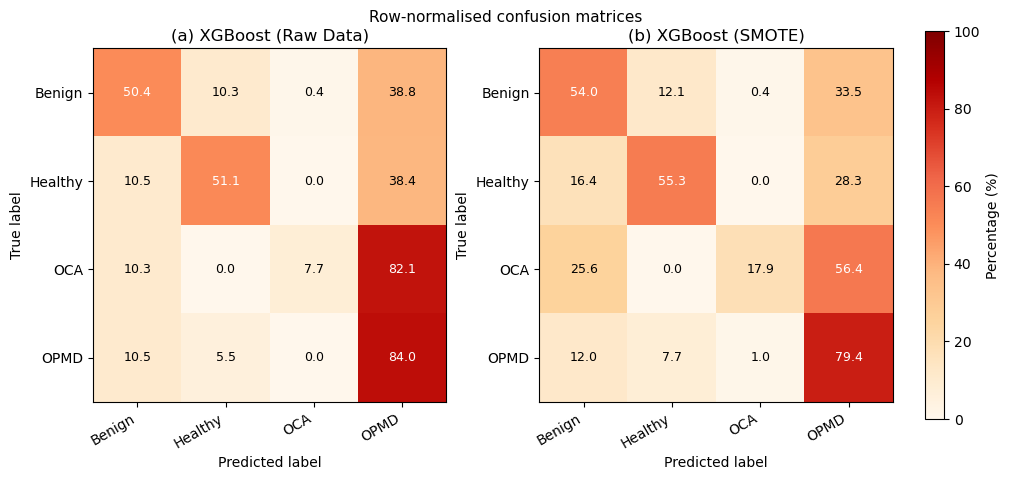

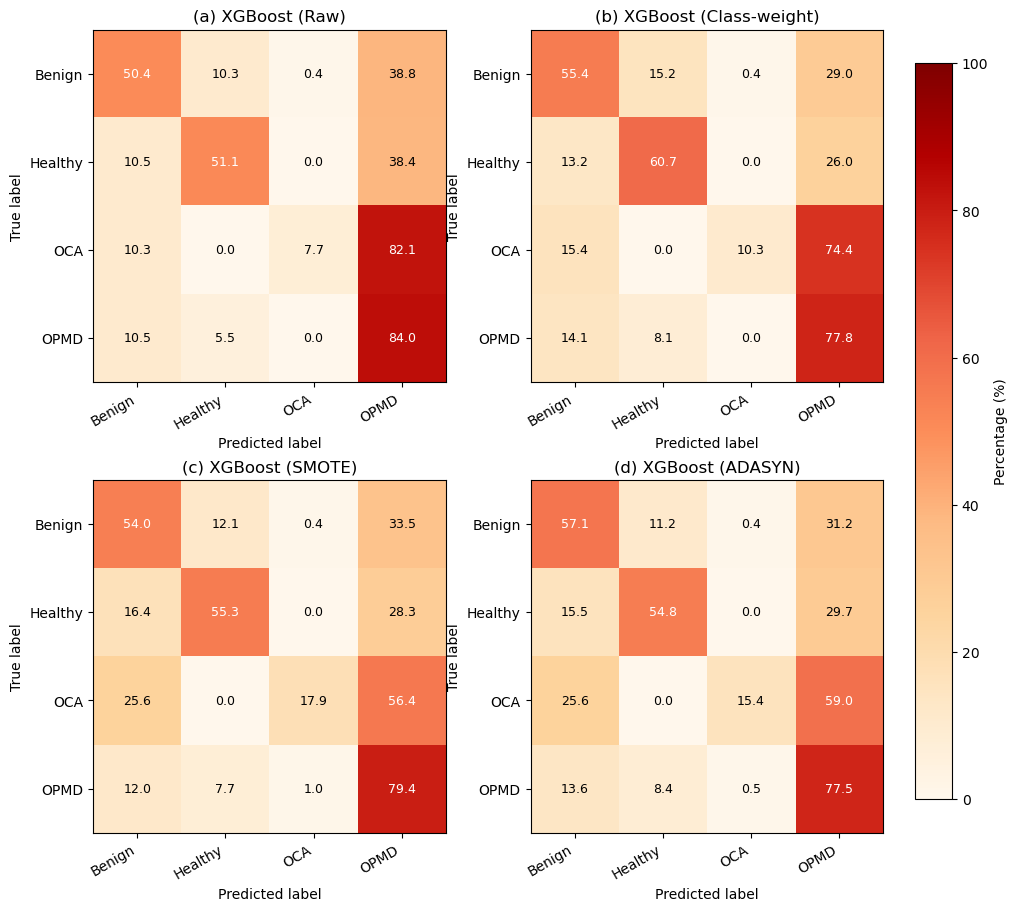

In [88]:
import numpy as np
import matplotlib.pyplot as plt

cm_xgb_raw = np.array([
    [113,  23,   1,  87],
    [ 23, 112,   0,  84],
    [  4,   0,   3,  32],
    [ 44,  23,   0, 351]
], dtype=int)

cm_xgb_smote = np.array([
    [121,  27,   1,  75],
    [ 36, 121,   0,  62],
    [ 10,   0,   7,  22],
    [ 50,  32,   4, 332]
], dtype=int)

# (Optional) If you also want class-weight and ADASYN later:
cm_xgb_classweight = np.array([
    [124,  34,   1,  65],
    [ 29, 133,   0,  57],
    [  6,   0,   4,  29],
    [ 59,  34,   0, 325]
], dtype=int)

cm_xgb_adasyn = np.array([
    [128,  25,   1,  70],
    [ 34, 120,   0,  65],
    [ 10,   0,   6,  23],
    [ 57,  35,   2, 324]
], dtype=int)

classes = ["Benign", "Healthy", "OCA", "OPMD"]


def row_normalise_percent(cm: np.ndarray) -> np.ndarray:
    """Return row-normalised percentages (each row ~ 100%)."""
    cm = cm.astype(float)
    row_sums = cm.sum(axis=1, keepdims=True)
    # Avoid divide-by-zero just in case
    row_sums[row_sums == 0] = 1.0
    return (cm / row_sums) * 100.0

def plot_cm_percent(ax, cm_percent: np.ndarray, classes, title: str,
                    vmin=0, vmax=100, cmap="OrRd"):
    im = ax.imshow(cm_percent, cmap=cmap, vmin=vmin, vmax=vmax, interpolation="nearest")
    ax.set(
        xticks=np.arange(len(classes)),
        yticks=np.arange(len(classes)),
        xticklabels=classes,
        yticklabels=classes,
        xlabel="Predicted label",
        ylabel="True label",
        title=title
    )
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # Annotate each cell with one decimal percentage, with automatic contrast
    thresh = (vmax - vmin) / 2.0
    for i in range(cm_percent.shape[0]):
        for j in range(cm_percent.shape[1]):
            val = cm_percent[i, j]
            color = "white" if val >= thresh else "black"
            ax.text(j, i, f"{val:.1f}", ha="center", va="center", color=color, fontsize=9)
    return im


cm_raw_pct   = row_normalise_percent(cm_xgb_raw)
cm_smote_pct = row_normalise_percent(cm_xgb_smote)

fig, axes = plt.subplots(1, 2, figsize=(10, 4.6), constrained_layout=True)
im1 = plot_cm_percent(axes[0], cm_raw_pct,   classes, "(a) XGBoost (Raw Data)")
im2 = plot_cm_percent(axes[1], cm_smote_pct, classes, "(b) XGBoost (SMOTE)")

cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), fraction=0.046, pad=0.04)
cbar.set_label("Percentage (%)")

fig.suptitle("Row-normalised confusion matrices", fontsize=11, y=1.02)

plt.savefig("xgb_confusion_raw_vs_smote_percent.png", dpi=300, bbox_inches="tight")
plt.show()


mats = [
     ("(a) XGBoost (Raw)",         row_normalise_percent(cm_xgb_raw)),
     ("(b) XGBoost (Class-weight)",row_normalise_percent(cm_xgb_classweight)),
     ("(c) XGBoost (SMOTE)",       row_normalise_percent(cm_xgb_smote)),
     ("(d) XGBoost (ADASYN)",      row_normalise_percent(cm_xgb_adasyn)),
 ]
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 9), constrained_layout=True)
vmax = 100
for ax, (title, m) in zip(axes2.ravel(), mats):
     im = plot_cm_percent(ax, m, classes, title, vmin=0, vmax=vmax)
cbar2 = fig2.colorbar(im, ax=axes2.ravel().tolist(), fraction=0.046, pad=0.04)
cbar2.set_label("Percentage (%)")
plt.savefig("xgb_confusion_all_strategies_percent.png", dpi=300, bbox_inches="tight")
plt.show()